In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline 

In [0]:
df=pd.read_csv("https://raw.githubusercontent.com/nick-edu/dmmldl/master/ForestFires.csv")

In [46]:
#A. Exploratory data analysis 
df.shape
#a total of 13 columns and 517 rows 

(517, 13)

In [47]:
df.isnull().any()
#no missing values

X        False
Y        False
month    False
day      False
FFMC     False
DMC      False
DC       False
ISI      False
temp     False
RH       False
wind     False
rain     False
area     False
dtype: bool

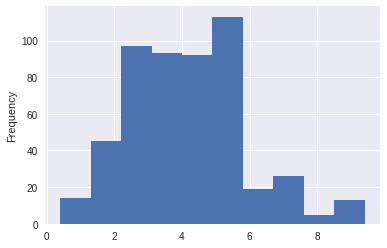

In [48]:
df["wind"].plot.hist()

#histogram plot for "wind" column

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


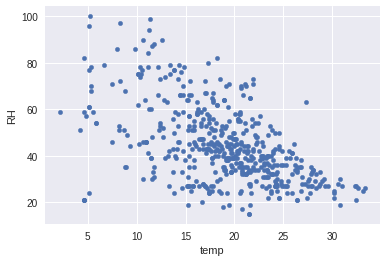

In [49]:
df.plot.scatter("temp", "RH")

#scatter plot of "temp" against "RH" 

In [50]:
#B Decision trees 

#before fitting the decision tree regression model, check data types 
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [51]:
#month and day are of object type. Dummies should be created for each level(group) of the 'day' and 'month' column 
month=pd.get_dummies(df["month"], prefix="month", drop_first=False)
df.drop("month", inplace=True, axis=1)
df=pd.concat([df, month], axis=1)
df.head()

day=pd.get_dummies(df["day"], prefix="day", drop_first=False)
df.drop("day", inplace=True, axis=1)
df=pd.concat([df, day], axis=1)
df.head()



,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,1,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,1,0,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,1,0,0,0,1,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,1,0,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,0,1,0,0,0


In [52]:

#identifying the columns 
list(df)

['X',
 'Y',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'temp',
 'RH',
 'wind',
 'rain',
 'area',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_fri',
 'day_mon',
 'day_sat',
 'day_sun',
 'day_thu',
 'day_tue',
 'day_wed']

In [53]:
features=['X',
 'Y',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'temp',
 'RH',
 'wind',
 'rain',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_fri',
 'day_mon',
 'day_sat',
 'day_sun',
 'day_thu',
 'day_tue',
 'day_wed']

#creating x and y variables 
x=df[features]
y=df.area

np.random.seed(1)

#splitting the dataset into train and test data 
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=1/4)

len(xTrain), len(xTest)

(387, 130)

In [54]:
#building the model
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(max_depth = 5)
reg.fit(xTrain, yTrain)



DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [55]:
#estimating accuracy of the tree 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
import numpy as np 

yPred = reg.predict(xTest)
rmse = np.sqrt(mean_squared_error(yTest, yPred))
print("RMSE:", rmse)

mae = mean_absolute_error(yTest, yPred)
print("MAE:", mae)

RMSE: 75.55369103347283
MAE: 21.691601490508706


In [56]:
#building a tree model with max_depth=15 
reg1 = DecisionTreeRegressor(max_depth = 15)
reg1.fit(xTrain, yTrain)

yPred1 = reg1.predict(xTest)
rmse1 = np.sqrt(mean_squared_error(yTest, yPred1))
print("RMSE1:", rmse1)

mae1 = mean_absolute_error(yTest, yPred1)
print("MAE1:", mae1)


RMSE1: 71.70755260441435
MAE1: 19.076226923076923


In [57]:
#building a tree model with max_depth=25
reg2 = DecisionTreeRegressor(max_depth = 25)
reg2.fit(xTrain, yTrain)

yPred2 = reg2.predict(xTest)
rmse2 = np.sqrt(mean_squared_error(yTest, yPred2))
print("RMSE2:", rmse2)

mae2 = mean_absolute_error(yTest, yPred2)
print("MAE2:", mae2)

RMSE2: 77.0806088156069
MAE2: 22.658


In [0]:
#max_depth=15 gives the best performing model with lowest RMSE and MAE performance scores